In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import sys
sys.path.append('..')
import clusterizer

%load_ext autoreload
%autoreload 2

Git root path found at: /home/rick/Documents/Universiteit/Wiskunde/Modellenpracticum/SCG-analyse
Using data path:        /home/rick/Documents/Universiteit/Wiskunde/Modellenpracticum/SCG-analyse/data/origineel


# Totale ordening in Clusters

Als location_range and time_range beide None zijn, dan is het Cluster het kleinst mogelijke cluster. Anders wordt het gesorteerd volgens het volgende principe:

1) Als iets None is, dan wordt het niet meegenomen in de vergelijking.

2) In een location/time scatter is linksonder het kleinst en rechtsboven het grootst

3) Tijd is belangrijker dan locatie

In [2]:
clusterNoneNone = clusterizer.cluster.Cluster()
cluster01None = clusterizer.cluster.Cluster(location_range = (0,1))
cluster12None = clusterizer.cluster.Cluster(location_range = (1,2))
cluster02None = clusterizer.cluster.Cluster(location_range = (0,2))

print("NoneNone < 01None: " + str(clusterNoneNone < cluster01None))
print("01None < 12None" + str(cluster01None < cluster12None))
print("01None < 02None: " + str(cluster01None < cluster02None))
print("-")
print("12None < 02None: " + str(cluster12None < cluster02None))
print("NoneNone < NoneNone: " + str(clusterNoneNone < clusterNoneNone))
print("01None < 01None: " + str(cluster01None < cluster01None))
print("-----")

date0 = np.datetime64("2000-01-01")
date1 = np.datetime64("2018-01-01")
date2 = np.datetime64("2018-01-25")
date3 = np.datetime64("2018-10-16")
clusterNone0 = clusterizer.cluster.Cluster(time_range = (date0, date1))
clusterNone1 = clusterizer.cluster.Cluster(time_range = (date1, date2))
cluster010 = clusterizer.cluster.Cluster(location_range = (0,1), time_range = (date0, date1))
cluster012 = clusterizer.cluster.Cluster(location_range = (0,1), time_range = (date2, date3))
cluster013 = clusterizer.cluster.Cluster(location_range = (0,1), time_range = (date3, date3))
cluster453 = clusterizer.cluster.Cluster(location_range = (4,5), time_range = (date3, date3))
cluster450 = clusterizer.cluster.Cluster(location_range = (4,5), time_range = (date0, date1))

print("None0 < None1: " + str(clusterNone0 < clusterNone1))
print("None0 < 010: " + str(clusterNone0 < cluster010))
print("010 < None0: " + str(cluster010 < clusterNone0))
print("-")
print("010 < 012: " + str(cluster010 < cluster012))
print("012 < 013: " + str(cluster012 < cluster013))
print("-")
print("013 < 453: " + str(cluster013 < cluster453))
print("012 < 450: " + str(cluster012 < cluster450))
print("450 < 012: " + str(cluster450 < cluster012))

NoneNone < 01None: True
01None < 12NoneTrue
01None < 02None: True
-
12None < 02None: False
NoneNone < NoneNone: False
01None < 01None: False
-----
None0 < None1: True
None0 < 010: True
010 < None0: False
-
010 < 012: True
012 < 013: True
-
013 < 453: True
012 < 450: False
450 < 012: True


In [3]:
circuitnr = clusterizer.globals.available_circuits[5]
print(circuitnr)
circuit = clusterizer.circuit.MergedCircuit(circuitnr)
circuit.build()

2063


<IPython.core.display.Javascript object>


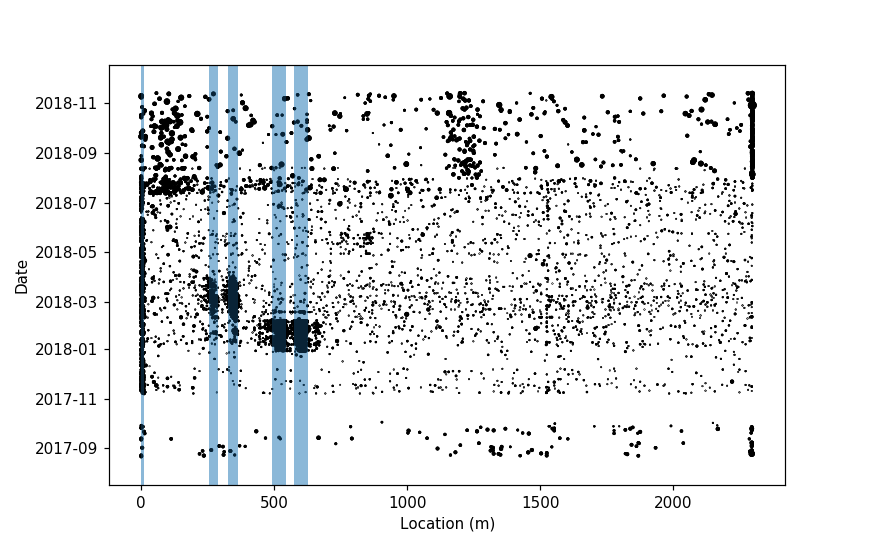

In [75]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [8, 5]

clusterizer.plot.draw_location_time_scatter(circuit)
plt.show()

In [77]:
clusters, bins, bin_contents, rate = clusterizer.algorithms.clusterize_poisson(circuit)
clusters_list = list(sorted(clusters))
print(clusters_list)
clusterizer.plot.draw_location_time_scatter(circuit)
clusterizer.plot.overlay_cluster_collection(clusters_list)
plt.show()

 to 12m, 256m to 288m, 328m to 364m, 492m to 544m, 576m to 628m]


# Weighted Clusters

We introduceren een nieuwe iets bij een cluster: Een gewicht
Dit gewicht is standaard 1 voor een normaal cluster, maar kan ook handmatig ingesteld worden door het mee te geven aan een cluster

Dit gewicht kan gebruikt worden om aan te geven dat twee clusters overlap hebben (gewicht gaat omhoog), of kleiner gemaakt worden om aan te geven dat het niet erg zeker is dat er ergens een cluster zit

In [6]:
weighted_clusters_list = [clusterizer.cluster.WeightedCluster(cluster) for cluster in clusters_list]
print(weighted_clusters_list)

 to 12m: Weight 1, 256m to 288m: Weight 1, 328m to 364m: Weight 1, 492m to 544m: Weight 1, 576m to 628m: Weight 1]


In [39]:
wcs = clusterizer.cluster.WeightedClusterSet(sorted(weighted_clusters_list))

In [60]:
cluster0 = clusters_list[0]
cluster256 = clusters_list[1]
cluster328 = clusters_list[2]
print(cluster0 & cluster256)
print(cluster0 | cluster256)

None
0m to 288m
